<a href="https://colab.research.google.com/github/Shirsendu1260/ai-notebooks/blob/main/ai_clustering_algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
plt.style.use('seaborn-whitegrid')
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large', titleweight='bold', titlesize=14, titlepad=10)

<ipython-input-2-0c7ad43dfa66>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


In [ ]:
df = pd.read_csv('/content/housing.csv')
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [ ]:
df.isnull().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

In [ ]:
df1 = df.loc[:, ['MedInc', 'Latitude', 'Longitude']]
df1.head()

,MedInc,Latitude,Longitude
0,8.3252,37.88,-122.23
1,8.3014,37.86,-122.22
2,7.2574,37.85,-122.24
3,5.6431,37.85,-122.25
4,3.8462,37.85,-122.25


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   MedInc     20640 non-null  float64
 1   Latitude   20640 non-null  float64
 2   Longitude  20640 non-null  float64
dtypes: float64(3)
memory usage: 483.9 KB


In [ ]:
from sklearn.cluster import KMeans

In [ ]:
# Create cluster feature
model = KMeans(n_clusters=6)
df1['Cluster'] = model.fit_predict(df1)
df1['Cluster'] = df1['Cluster'].astype('category')
df1.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,MedInc,Latitude,Longitude,Cluster
0,8.3252,37.88,-122.23,5
1,8.3014,37.86,-122.22,5
2,7.2574,37.85,-122.24,5
3,5.6431,37.85,-122.25,5
4,3.8462,37.85,-122.25,2


<Axes: xlabel='Longitude', ylabel='Latitude'>

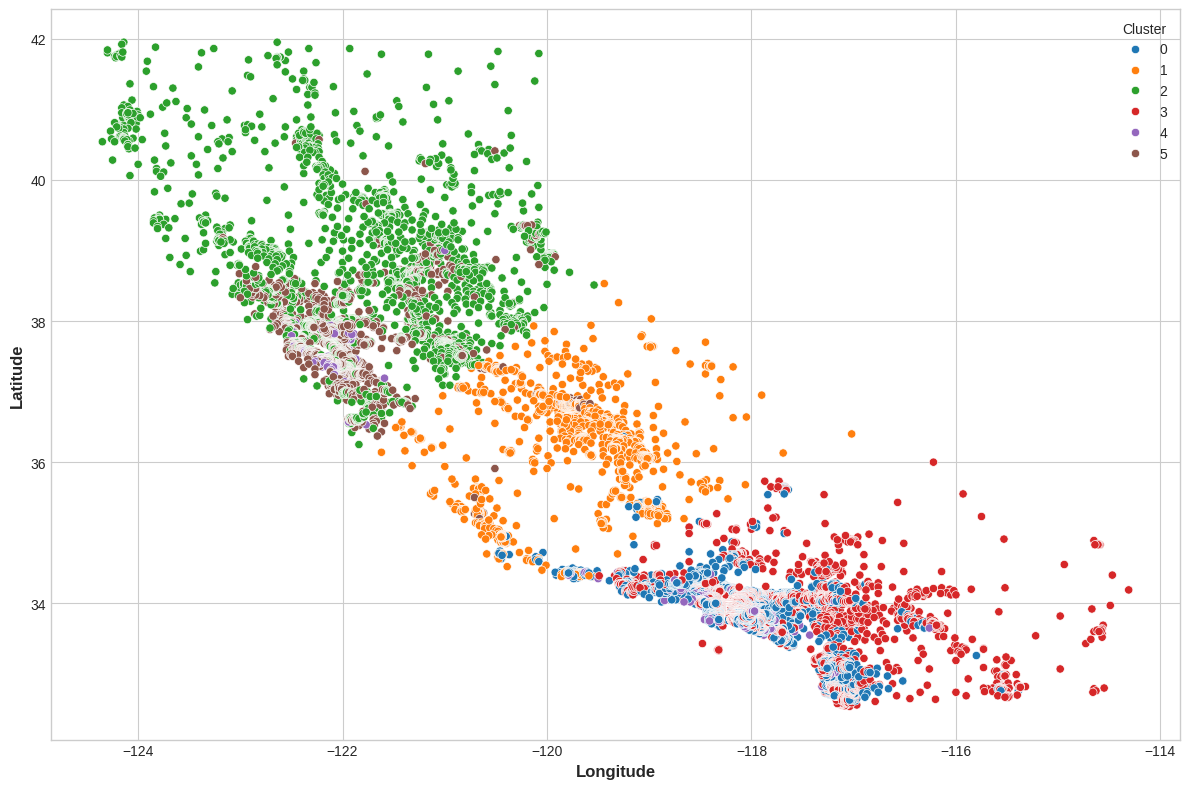

In [ ]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Longitude', y='Latitude', hue='Cluster', data=df1)

In [ ]:
# Copy and create 'MedHouseVal' column from original dataframe
df1['MedHouseVal'] = df['MedHouseVal']

In [ ]:
df1.head()

,MedInc,Latitude,Longitude,Cluster,MedHouseVal
0,8.3252,37.88,-122.23,5,4.526
1,8.3014,37.86,-122.22,5,3.585
2,7.2574,37.85,-122.24,5,3.521
3,5.6431,37.85,-122.25,5,3.413
4,3.8462,37.85,-122.25,2,3.422


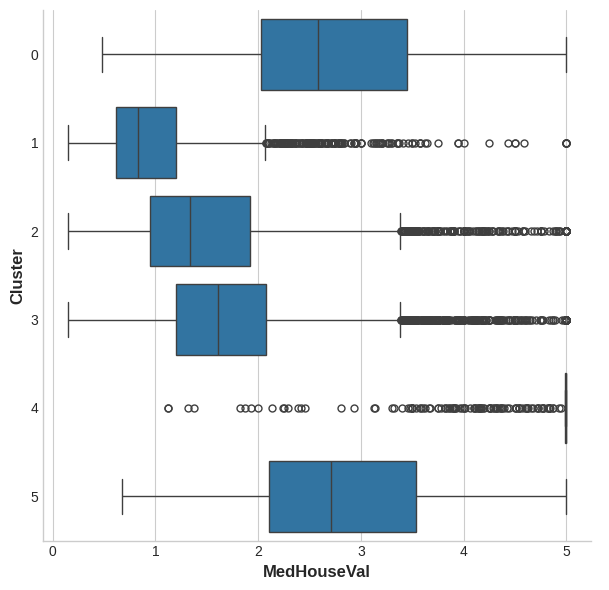

In [ ]:
sns.catplot(data=df1, x='MedHouseVal', y='Cluster', kind='box', height=6)